## Observations and Insights 

Capomulin and Ramicane are the most successful drugs in reducing the size of the tumors within the mice subjects.Ramicane outformed the Capomulin, Ceftamin, and Infubinol in tumor volume reduction and lower metastatic site occurences. But Capomulin has slightly higher survival rate compared to Ramicane. These two treatments out of the 4 drug regimens saw average tumor size consistently decrease over the 45 day treatment. 

With a correlation of 0.84, there is a positive correlation between average tumor volume and weight within the subject mice.

Capomulin and Ramicane had the most data points out of all the drugs present in the study.

Overall Ceftamin and Infubinol treatments did not show improvement over 45 day treatment. In fact the tumor size has increased since the treatment started. So these two can be ruled out from treatment options. 

In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns

In [3]:


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_df = pd.read_csv(mouse_metadata_path)
results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_df, results_df, how='left', on=['Mouse ID', 'Mouse ID'])
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
merged_df.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [5]:
merged_df['Sex'] = merged_df['Sex'].astype('category')
merged_df.dtypes

Mouse ID                object
Drug Regimen            object
Sex                   category
Age_months               int64
Weight (g)               int64
Timepoint                int64
Tumor Volume (mm3)     float64
Metastatic Sites         int64
dtype: object

In [6]:
# Checking the number of mice in the DataFrame.
merged_df['Mouse ID'].count()

1893

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse = merged_df[merged_df.duplicated(['Mouse ID', 'Timepoint'],keep=False)]['Mouse ID']
dup_mouse

908    g989
909    g989
910    g989
911    g989
912    g989
913    g989
914    g989
915    g989
916    g989
917    g989
Name: Mouse ID, dtype: object

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_rows = merged_df[merged_df.duplicated(['Mouse ID', 'Timepoint'],keep=False)]
dup_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Checking the number of mice in the clean DataFrame.
mouse_cnt = clean_df['Mouse ID'].count()
mouse_cnt

1888

## Summary Statistics

In [11]:
# Generate a summary statistics table of 
# mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.

regimen_grp = clean_df.groupby(by='Drug Regimen')
# create the dataframe for results set
summary_stats = pd.DataFrame(regimen_grp.count())

# number of trials per mouse
summary_stats["Trials"] = pd.DataFrame(regimen_grp['Tumor Volume (mm3)'].count())

# rest of the stats requested
summary_stats["Mean"] = pd.DataFrame(regimen_grp['Tumor Volume (mm3)'].mean())
summary_stats["Median"] = pd.DataFrame(regimen_grp['Tumor Volume (mm3)'].median())
summary_stats["Variance"] = pd.DataFrame(regimen_grp['Tumor Volume (mm3)'].var())
summary_stats["StdDev"] = pd.DataFrame(regimen_grp['Tumor Volume (mm3)'].std())
summary_stats["StdErrMean"] = pd.DataFrame(regimen_grp['Tumor Volume (mm3)'].sem())

summary_stats = summary_stats[["Trials", "Mean", "Median", "Variance", "StdDev", "StdErrMean"]]
summary_stats

,Trials,Mean,Median,Variance,StdDev,StdErrMean
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,156,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of 
# mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.
summary_stats_2 = regimen_grp.agg(['count', 'mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_stats_2

,count,mean,median,var,std,sem
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,156,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

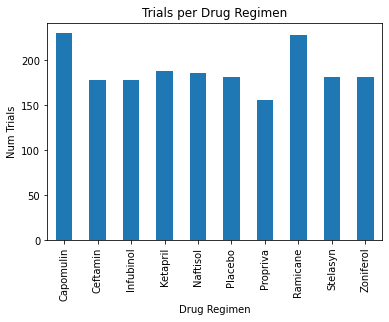

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate a bar plot showing the number of mice per time point for each treatment 
# throughout the course of the study using pandas.
num_trials = summary_stats[['Trials']]

num_trials.plot(kind="bar", rot=90, legend=False)

plt.title("Trials per Drug Regimen")
plt.ylabel("Num Trials")

plt.show()
plt.tight_layout()

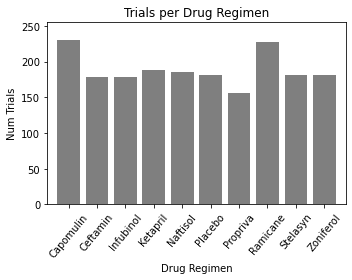

In [14]:
# Generate a bar plot showing the number of mice per time point for each treatment 
# throughout the course of the study using pyplot.

x_axis = np.arange(len(num_trials))
tick_locations = [x for x in x_axis]
plt.figure(figsize=(5,4))
plt.bar(x_axis, num_trials['Trials'], color = "k", alpha = 0.5)
plt.xticks(tick_locations, num_trials.index.values, rotation=50)

# Set x and y limits
plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(num_trials["Trials"])+25)

# Set a Title and labels
plt.title("Trials per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Num Trials")

plt.tight_layout()
plt.show()

## Pie Plots

In [15]:
gender_grp = clean_df.groupby(['Sex'])['Mouse ID'].count()
gender_grp

Sex
Female    930
Male      958
Name: Mouse ID, dtype: int64

In [16]:
labels = [clean_df['Sex'].unique()]
labels_list = list(gender_grp.index)
labels_list

['Female', 'Male']

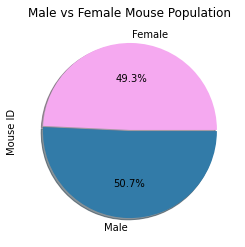

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
plt.figure(figsize=(4,4))
explode = (0.013, 0)
colors = ['#f5a9f0', '#327ba8']

gender_grp.plot(kind='pie', colors=colors, explode=explode, 
               autopct="%1.1f%%", shadow=True)

plt.title('Male vs Female Mouse Population')
plt.tight_layout

plt.show()

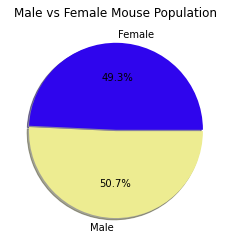

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(4,4))
colors = ["#2f05ed", "#edec91"]
explode = (0.015, 0)
plt.pie(gender_grp, colors=colors, explode = explode, labels=labels_list,
        autopct="%1.1f%%", shadow=True)
plt.title('Male vs Female Mouse Population')
plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
clean_df["Drug Regimen"].describe()

count          1888
unique           10
top       Capomulin
freq            230
Name: Drug Regimen, dtype: object

In [20]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
best_regimens = clean_df[clean_df["Drug Regimen"].isin(top_4)]
best_regimens = best_regimens.sort_values(["Timepoint"], ascending=True)
best_regimens

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1391,q132,Infubinol,Female,1,30,0,45.000000,0
195,i738,Capomulin,Female,23,20,0,45.000000,0
205,a520,Ramicane,Male,13,21,0,45.000000,0
1370,p438,Ceftamin,Female,11,26,0,45.000000,0
...,...,...,...,...,...,...,...,...
350,v923,Capomulin,Female,19,21,45,40.658124,2
144,m957,Capomulin,Female,3,19,45,33.329098,1
337,j119,Capomulin,Female,7,23,45,38.125164,1
59,s508,Ramicane,Male,1,17,45,30.276232,0


In [21]:
quartiles = best_regimens['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_tumor_vol = best_regimens.loc[(best_regimens['Tumor Volume (mm3)'] < lower_bound) | 
                                 (best_regimens['Tumor Volume (mm3)'] > upper_bound)]
outlier_tumor_vol

The lower quartile of Tumor Volume is: 40.2201707875
The upper quartile of Tumor Volume is: 50.356470630000004
The interquartile range of Tumor Volume is: 10.136299842500001
The the median of Tumor Volume is: 45.0 
Values below 25.01572102375 could be outliers.
Values above 65.56092039375001 could be outliers.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
635,c139,Infubinol,Male,11,28,35,67.821420,1
949,i386,Infubinol,Female,23,29,40,67.289621,4
636,c139,Infubinol,Male,11,28,40,69.428141,2
1032,k210,Ceftamin,Male,15,28,40,66.622836,2
8,k403,Ramicane,Male,21,16,40,24.365505,1
637,c139,Infubinol,Male,11,28,45,72.226731,2
9,k403,Ramicane,Male,21,16,45,22.050126,1
540,a685,Infubinol,Male,8,30,45,66.083066,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
19,s185,Capomulin,Female,3,17,45,23.343598,1


In [22]:
best_regimens_grp = best_regimens.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
best_regimens_grp

Drug Regimen  Mouse ID
Capomulin     b128        38.982878
              b742        38.939633
              f966        30.485985
              g288        37.074024
              g316        40.159220
                            ...    
Ramicane      s508        30.276232
              u196        40.667713
              w678        43.166373
              y449        44.183451
              z578        30.638696
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [23]:
best_regimens_df = best_regimens_grp.to_frame()
best_regimens_df

Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    b128               38.982878
             b742               38.939633
             f966               30.485985
             g288               37.074024
             g316               40.159220
...                                   ...
Ramicane     s508               30.276232
             u196               40.667713
             w678               43.166373
             y449               44.183451
             z578               30.638696

[100 rows x 1 columns]

In [24]:
final_df = best_regimens_df.reset_index()
final_df

,Drug Regimen,Mouse ID,Tumor Volume (mm3)
0,Capomulin,b128,38.982878
1,Capomulin,b742,38.939633
2,Capomulin,f966,30.485985
3,Capomulin,g288,37.074024
4,Capomulin,g316,40.159220
...,...,...,...
95,Ramicane,s508,30.276232
96,Ramicane,u196,40.667713
97,Ramicane,w678,43.166373
98,Ramicane,y449,44.183451


In [25]:
tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(top_4)
tumor_list_df

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,"[38.98287774, 38.93963263, 30.48598484, 37.074..."
Ramicane,"[38.407618299999996, 43.04754260000001, 38.810..."
Infubinol,"[67.97341878, 65.52574285, 57.03186187, 66.083..."
Ceftamin,"[62.99935619, 45.0, 56.05774909, 55.74282869, ..."


In [26]:
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
tumor_vols

[[38.98287774,
  38.93963263,
  30.48598484,
  37.07402422,
  40.1592203,
  47.68596303,
  37.31184577,
  38.125164399999996,
  38.75326548,
  41.48300765,
  38.84687569,
  28.43096411,
  33.32909778,
  46.53920617,
  32.37735684,
  41.58152074,
  23.34359787,
  40.72857787,
  34.45529799,
  31.02392294,
  40.65812366,
  39.95234669,
  36.04104736,
  28.48403281,
  31.896238399999998],
 [38.407618299999996,
  43.04754260000001,
  38.81036633,
  32.97852192,
  38.34200823,
  33.39765251,
  37.31123552,
  40.65900627,
  29.12847181,
  33.56240217,
  36.37451039,
  31.56046955,
  36.13485243,
  22.05012627,
  30.56462509,
  31.09533505,
  45.22086888,
  36.56165229,
  37.22565033,
  43.41938077,
  30.27623175,
  40.66771292,
  43.16637266,
  44.18345092,
  30.63869575],
 [67.97341878,
  65.52574285,
  57.03186187,
  66.08306589,
  72.2267309,
  36.321345799999996,
  60.96971133,
  62.43540402,
  60.91876652,
  67.28962147,
  66.19691151,
  62.11727887,
  47.01036401,
  60.16518046,
  55.6

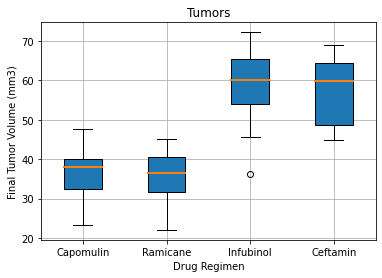

In [27]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(tumor_vols, labels=top_4, patch_artist=True, medianprops={'linewidth': 2}) 
plt.grid()          
plt.show()

In [28]:
cap_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
cap_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [29]:
cap_df['Mouse ID'].value_counts()

x401    10
s710    10
m957    10
s185    10
j119    10
y793    10
b742    10
r944    10
b128    10
l897    10
r554    10
l509    10
m601    10
v923    10
g316    10
i557    10
w914    10
t565    10
i738    10
g288    10
u364    10
j246     8
f966     5
r157     4
w150     3
Name: Mouse ID, dtype: int64

## Line and Scatter Plots

In [30]:
line_df = cap_df.loc[cap_df["Mouse ID"] == "x401",:]
line_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
20,x401,Capomulin,Female,16,15,0,45.000000,0
21,x401,Capomulin,Female,16,15,5,45.473753,0
22,x401,Capomulin,Female,16,15,10,39.113891,0
23,x401,Capomulin,Female,16,15,15,39.776250,0
24,x401,Capomulin,Female,16,15,20,36.065835,0
25,x401,Capomulin,Female,16,15,25,36.617120,0
26,x401,Capomulin,Female,16,15,30,32.915292,0
27,x401,Capomulin,Female,16,15,35,30.206825,0
28,x401,Capomulin,Female,16,15,40,28.167397,0
29,x401,Capomulin,Female,16,15,45,28.484033,0


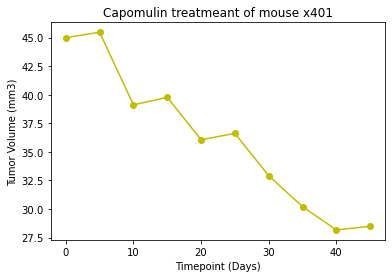

In [31]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
time_pt = line_df["Timepoint"]
tum_vol = line_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse x401')
plt.plot(time_pt, tum_vol,'y.-', markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.tight_layout

plt.show()

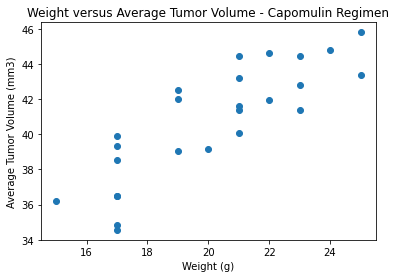

In [32]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_avg = cap_df.groupby(['Mouse ID']).mean()
plt.scatter(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
plt.title('Weight versus Average Tumor Volume - Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.tight_layout
plt.show()

## Correlation and Regression

In [33]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr=round(st.pearsonr(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


In [34]:
model=st.linregress(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
model

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712645e-07, stderr=0.1275435903320134)

In [35]:
slope, intercept, rvalue, pvalue, stderr = st.linregress(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])

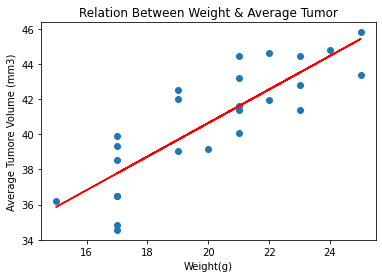

In [36]:
y_values = cap_avg['Weight (g)']*slope+intercept
plt.scatter(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
plt.plot(cap_avg['Weight (g)'],y_values,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
plt.title('Relation Between Weight & Average Tumor')

plt.show()

# Tumor Response to Treatment

In [37]:
#keep only the drugs we want to examine
merged_df = clean_df[(clean_df["Drug Regimen"] == 'Capomulin') |
                      (clean_df["Drug Regimen"] == 'Ceftamin') |
                      (clean_df["Drug Regimen"] == 'Infubinol') |
                      (clean_df["Drug Regimen"] == 'Ramicane')
                     ]
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [38]:
#group by treatment for change in average tumor size calculations
avg_volume = pd.DataFrame(merged_df.groupby(['Drug Regimen', 'Timepoint']).mean()['Tumor Volume (mm3)'])
volume_sem = pd.DataFrame(merged_df.groupby(['Drug Regimen', 'Timepoint']).sem()['Tumor Volume (mm3)'])

In [39]:
#reshaping of avg tumor volume data
avg_volume = avg_volume.unstack(level = 0)
avg_volume.columns = avg_volume.columns.get_level_values(1)
avg_volume

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,46.541247,43.944859
10,43.084291,48.285125,49.403909,42.531957
15,42.064317,50.094055,51.296397,41.495061
20,40.716325,52.157049,53.197691,40.238325
25,39.939528,54.287674,55.715252,38.974300
30,38.769339,56.769517,58.299397,38.703137
35,37.816839,58.827548,60.742461,37.451996
40,36.958001,61.467895,63.162824,36.574081


In [40]:
#reshaping of avg tumor volume data - std error mean
volume_sem = volume_sem.unstack(level=0)
volume_sem.columns = volume_sem.columns.get_level_values(1)
volume_sem

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.477067,0.482955
10,0.702684,0.236144,0.282346,0.720225
15,0.838617,0.332053,0.357705,0.770432
20,0.909731,0.359482,0.476210,0.786199
25,0.881642,0.439356,0.550315,0.746991
30,0.934460,0.490620,0.631061,0.864906
35,1.052241,0.692248,0.984155,0.967433
40,1.223608,0.708505,1.055220,1.128445


<ipython-input-41-66d421d2767f>:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


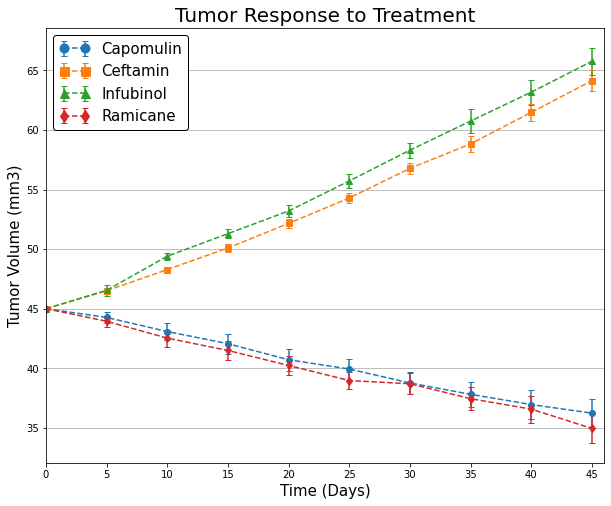

In [41]:
plt.figure(figsize = (10,8))

plt.title('Tumor Response to Treatment', fontdict = {'fontsize': 20})
plt.xlabel('Time (Days)', fontdict = {'fontsize': 15})
plt.ylabel('Tumor Volume (mm3)', fontdict = {'fontsize': 15})
plt.xticks(np.arange(0, avg_volume.index.max()+3 , 5)) # location of separators for timepoint
plt.xlim(0, avg_volume.index.max() + 1) 

xvals = avg_volume.index #timepoints

# markers for the charts starting this one
markers = ['o', 's', '^', 'd']
labels= ['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']

#count for markers and labels
count = 0

#plot each tumor volume column with standard error
for c in avg_volume.columns:
    plt.errorbar(xvals, 
                 avg_volume[c], 
                 volume_sem[c], #std error
                 linestyle = '--', 
                 marker =  markers[count], 
                 label = labels[count],
                 capthick = 1, #for caps on error bars 
                 capsize = 3)  # for caps on error bars
    count += 1

#legend options
lg = plt.legend(numpoints = 2, # gives two symbols in legend
                frameon = True, 
                markerscale = 1.5, 
                edgecolor = 'black', 
                fontsize = '15', 
                framealpha = 1)
ax = plt.axes()        
ax.yaxis.grid()
plt.show()

# Metastatic Response to Treatment

In [42]:
#group by treatment for metastatic site counts and std error
avg_num_spread = pd.DataFrame(merged_df.groupby(['Drug Regimen', 'Timepoint']).mean()['Metastatic Sites'])
avg_spread_err = pd.DataFrame(merged_df.groupby(['Drug Regimen', 'Timepoint']).sem()['Metastatic Sites'])

In [43]:
#reshaping of metastatic site data
avg_num_spread = avg_num_spread.unstack(level = 0)
avg_num_spread.columns = avg_num_spread.columns.get_level_values(level = 1)
avg_num_spread

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.120000
10,0.320000,0.600000,0.666667,0.250000
15,0.375000,0.789474,0.904762,0.333333
20,0.652174,1.111111,1.050000,0.347826
25,0.818182,1.500000,1.277778,0.652174
30,1.090909,1.937500,1.588235,0.782609
35,1.181818,2.071429,1.666667,0.952381
40,1.380952,2.357143,2.100000,1.100000


In [44]:
#reshaping of metastatic data - std error
avg_spread_err = avg_spread_err.unstack(level = 0)
avg_spread_err.columns = avg_spread_err.columns.get_level_values(level = 1)
avg_spread_err

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.066332
10,0.125433,0.152177,0.159364,0.090289
15,0.132048,0.180625,0.194015,0.115261
20,0.161621,0.241034,0.234801,0.119430
25,0.181818,0.258831,0.265753,0.119430
30,0.172944,0.249479,0.227823,0.139968
35,0.169496,0.266526,0.224733,0.145997
40,0.175610,0.289128,0.314466,0.160591


<ipython-input-45-d6d8d64101fa>:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


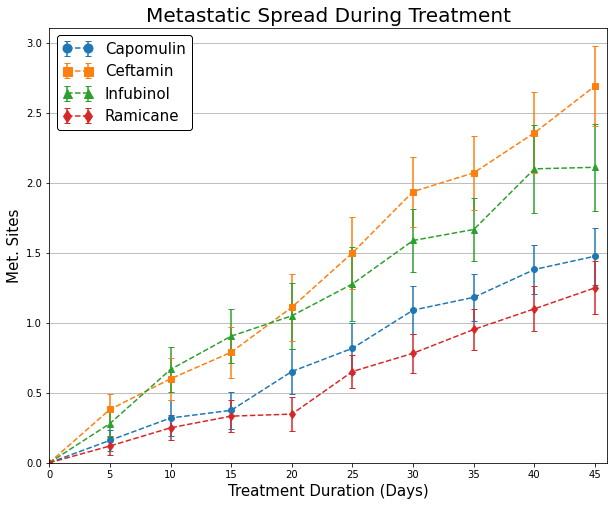

In [45]:
plt.figure(figsize = (10,8))
plt.title('Metastatic Spread During Treatment', fontdict = {'fontsize': 20})
plt.xlabel('Treatment Duration (Days)', fontdict = {'fontsize': 15})
plt.ylabel('Met. Sites', fontdict = {'fontsize': 15})
plt.xticks(np.arange(0,avg_num_spread.index.max() + 3 ,5))
plt.xlim(0, avg_num_spread.index.max()+1)
plt.ylim(0, avg_num_spread.max().max() + avg_spread_err.max().max() + .1)
                                                            
xvals = avg_num_spread.index #timepoints
                                                            
#reset the count to 0 for this loop
count = 0 
for c in avg_num_spread:
    plt.errorbar(xvals, 
                 avg_num_spread[c], 
                 avg_spread_err[c], 
                 linestyle = '--', 
                 marker =  markers[count], 
                 label = labels[count],
                 capthick = 1, 
                 capsize = 3)
    count += 1
    
#legend options
lg = plt.legend(numpoints = 2, 
                frameon = True, 
                markerscale = 1.5, 
                edgecolor = 'black', 
                fontsize = '15', 
                framealpha = 1)
ax = plt.axes()        
ax.yaxis.grid()
plt.show()

# Survival Rates

In [46]:
#gets dataframe of data counts at each time point per drug
#this corresponds to how many mice are still in study and therefore, alive
mice_count = merged_df.groupby(['Drug Regimen', 'Timepoint']).count()['Mouse ID']
mice_count = mice_count.unstack(level = 0)
mice_count

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Timepoint,,,,
0,25,25,25,25
5,25,21,25,25
10,25,20,21,24
15,24,19,21,24
20,23,18,20,23
25,22,18,18,23
30,22,16,17,23
35,22,14,12,21
40,21,14,10,20


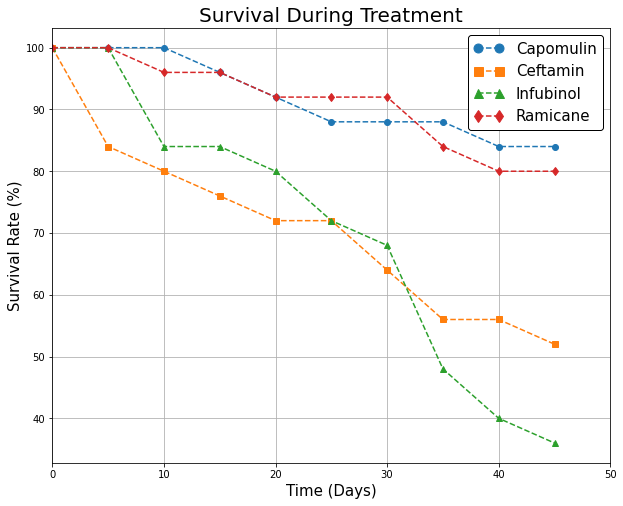

In [47]:
#plot options
plt.figure(figsize = (10,8))
plt.title('Survival During Treatment', fontdict = {'fontsize': 20})
plt.xlabel('Time (Days)', fontdict = {'fontsize': 15})
plt.ylabel('Survival Rate (%)', fontdict = {'fontsize': 15})
plt.xlim(0, mice_count.index.max()+5)


xvals = mice_count.index #timepoints

count = 0 

for c in mice_count:
    yvals = mice_count[c]/mice_count.loc[0,c] * 100 #calculates survival rate for each timepoint
    plt.plot(xvals, 
             yvals, 
             linestyle = '--', 
             marker =  markers[count],
             label = labels[count] 
             )
    count += 1
    
#legend options
lg = plt.legend(numpoints = 2, 
                frameon = True, 
                markerscale = 1.5, 
                edgecolor = 'black', 
                fontsize = '15', 
                framealpha = 1)
plt.grid()
plt.show()

# Summary Bar Graph

In [48]:
#calculates tumor change for each drug
tumor_change = (avg_volume.loc[45, :] - avg_volume.loc[0, :])/avg_volume.loc[0, :] * 100
tumor_change

Drug Regimen
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ramicane    -22.320900
dtype: float64

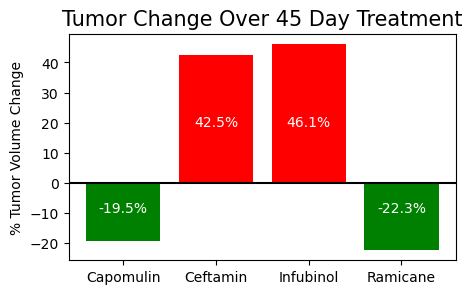

In [49]:
plt.figure(figsize=(5,3), dpi=100)
plt.title('Tumor Change Over 45 Day Treatment', fontdict = {'fontsize': 15})
plt.ylabel('% Tumor Volume Change')
plt.axhline(y=0, color = 'black') #adds a horizontal line at zero
xlabels = tumor_change.index
#puts drug names as labels
plt.xticks(np.arange(len(xlabels)), xlabels)

#graphs % change of tumor as bar graph
plt.bar(np.arange(4), 
        tumor_change, 
        # colors each bar appropriately based on + or - values by using a conditional
        color = ['red' if tumor_change[r] > 0 else 'green' for r in np.arange(len(xlabels))]
       )

#count for x coordinate location of value label
count = 0

#loops through tumor change data and places the value in the correct position based on + or - values
for r in tumor_change:
    if r < 0:
        y_coor = -8.5
    else:
        y_coor = 20
    plt.text(count, y_coor, str(round(r, 1)) + '%', ha = 'center', va='center', color = 'white')
    count += 1
    

plt.show()